In [21]:
import sys
import os
project_root = os.path.abspath(os.path.join(os.getcwd(), "../.."))
if project_root not in sys.path:
    sys.path.insert(0, project_root)

In [22]:
from src.signals.daily.dataset_features import create_features_dataframe
from src.signals.daily.train_model import predict_arima_returns, predict_garch_returns, predict_linear_returns, predict_xgbregressor_returns
from src.utils.plots import plot_multiple_strategies_performance
from src.evaluation.strategy_indicators import compare_strategies_stats
from src.signals.daily.backtest_strategies import backtest_long_short, backtest_threshold_strategy, backtest_long_only

### 1. Single Stock Strategies

In [23]:
df_features = create_features_dataframe(ticker='AIR.PA', start_date='2024-03-01', end_date='2024-10-01')

Train 4 models : ARIMA, GARCH, Linear, Gradient  Boosted Tree

In [ ]:
df_predict_arima= predict_arima_returns(df_features, 15)
df_predict_garch= predict_garch_returns(df_features, 15)
df_predict_linear = predict_linear_returns(df_features, 15)
df_predict_xgr = predict_xgbregressor_returns(df_features, 15)

#### a. Long Short Strategy

In [25]:
df_arima = backtest_long_short(df_predict_arima)
df_garch = backtest_long_short(df_predict_garch)
df_linear = backtest_long_short(df_predict_linear)
df_xgr = backtest_long_short(df_predict_linear)

In [26]:
df_linear

,predict_return_t,return_t,position,strategy_return,cumulative_return
2024-03-28,-0.000822,-0.021073,NaN,NaN,NaN
2024-04-02,-0.015993,0.005370,-1.0,-0.005370,0.994630
2024-04-03,-0.010973,-0.000595,-1.0,0.000595,0.995222
2024-04-04,-0.002381,0.000357,-1.0,-0.000357,0.994867
2024-04-05,-0.000202,0.014887,-1.0,-0.014887,0.980056
...,...,...,...,...,...
2024-09-23,-0.011328,0.014784,1.0,0.014784,1.236007
2024-09-24,-0.009708,-0.010581,-1.0,0.010581,1.249085
2024-09-25,-0.004911,0.006272,-1.0,-0.006272,1.241250
2024-09-26,-0.012482,-0.003878,-1.0,0.003878,1.246064


In [27]:
compare_strategies_stats(df_garch, df_arima, df_linear, df_xgr, 'AIR.PA')

,AIR.PA,GARCH,ARIMA,Linear Regression,Gradient Boosted Tree
Total Return,-0.204343,0.014612,-0.085441,0.246064,0.246064
Annualized Return,-0.355787,0.028298,-0.157859,0.526819,0.526819
Volatility,0.249684,0.254655,0.254528,0.251351,0.251351
Sharpe Ratio,-1.424950,0.111124,-0.620203,2.095945,2.095945
Max Drawdown,-0.240353,-0.108323,-0.137105,-0.101549,-0.101549


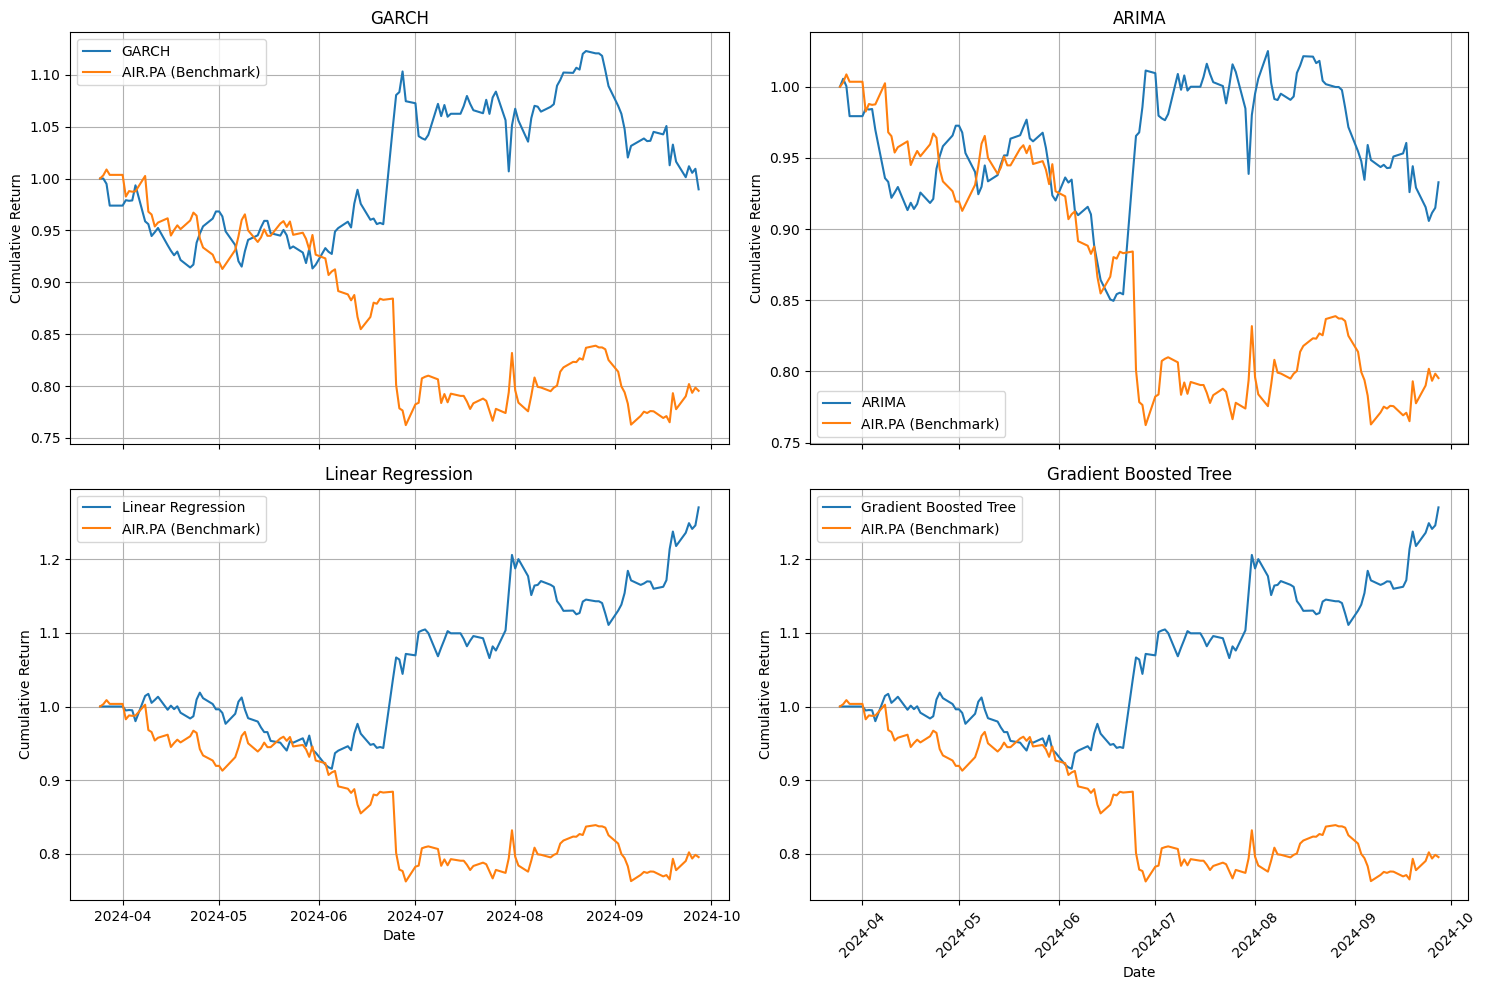

In [28]:
plot_multiple_strategies_performance(df_garch, df_arima, df_linear, df_xgr, 'AIR.PA')

#### b. Long Only Strategy

In [29]:
df_arima_l = backtest_long_only(df_predict_arima)
df_garch_l = backtest_long_only(df_predict_garch)
df_linear_l = backtest_long_only(df_predict_linear)
df_xgr_l = backtest_long_only(df_predict_linear)

In [30]:
compare_strategies_stats(df_garch_l, df_arima_l, df_linear_l, df_xgr_l, 'AIR.PA')

,AIR.PA,GARCH,ARIMA,Linear Regression,Gradient Boosted Tree
Total Return,-0.204343,-0.098929,-0.144946,0.006567,0.006567
Annualized Return,-0.355787,-0.181589,-0.260091,0.012670,0.012670
Volatility,0.249684,0.114186,0.121739,0.150624,0.150624
Sharpe Ratio,-1.424950,-1.590290,-2.136471,0.084118,0.084118
Max Drawdown,-0.240353,-0.112124,-0.136620,-0.097259,-0.097259


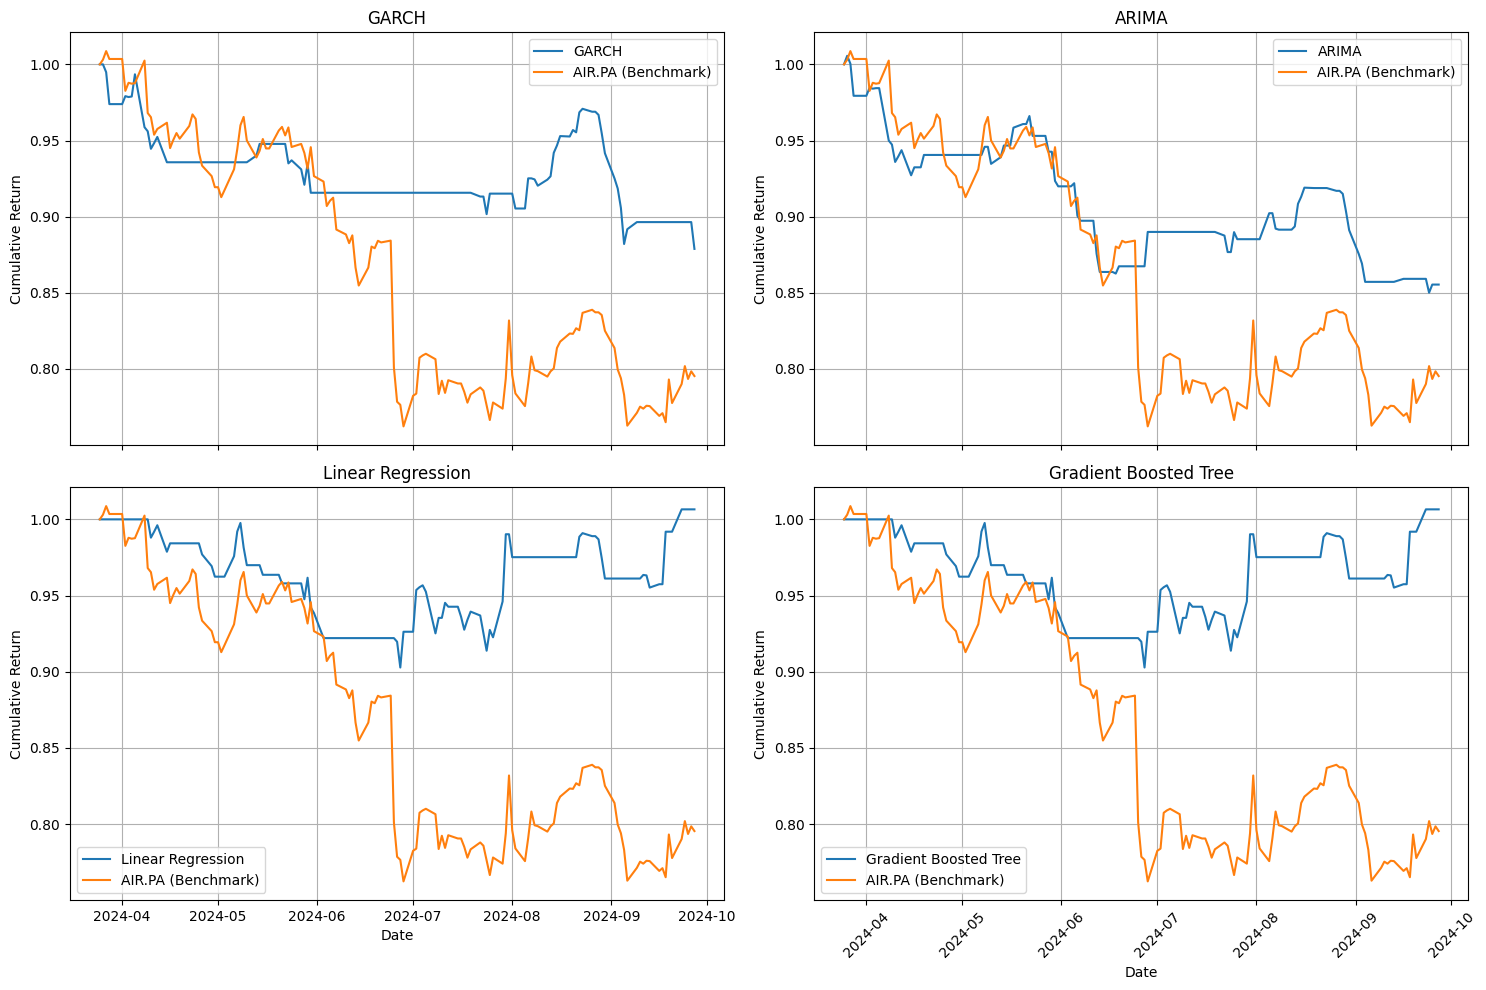

In [31]:
plot_multiple_strategies_performance(df_garch_l, df_arima_l, df_linear_l, df_xgr_l, 'AIR.PA')

#### b. Long Short with threshold

In [32]:
threshold = 0.001
df_arima_t = backtest_threshold_strategy(df_predict_arima, threshold)
df_garch_t = backtest_threshold_strategy(df_predict_garch, threshold)
df_linear_t = backtest_threshold_strategy(df_predict_linear, threshold)
df_xgr_t = backtest_threshold_strategy(df_predict_linear, threshold)

In [33]:
compare_strategies_stats(df_garch_t, df_arima_t, df_linear_t, df_xgr_t, 'AIR.PA')

,AIR.PA,GARCH,ARIMA,Linear Regression,Gradient Boosted Tree
Total Return,-0.204343,-0.006027,-0.116259,0.066435,0.066435
Annualized Return,-0.355787,-0.011562,-0.211599,0.131714,0.131714
Volatility,0.249684,0.244312,0.245369,0.226694,0.226694
Sharpe Ratio,-1.424950,-0.047326,-0.862370,0.581019,0.581019
Max Drawdown,-0.240353,-0.108323,-0.154291,-0.110585,-0.110585


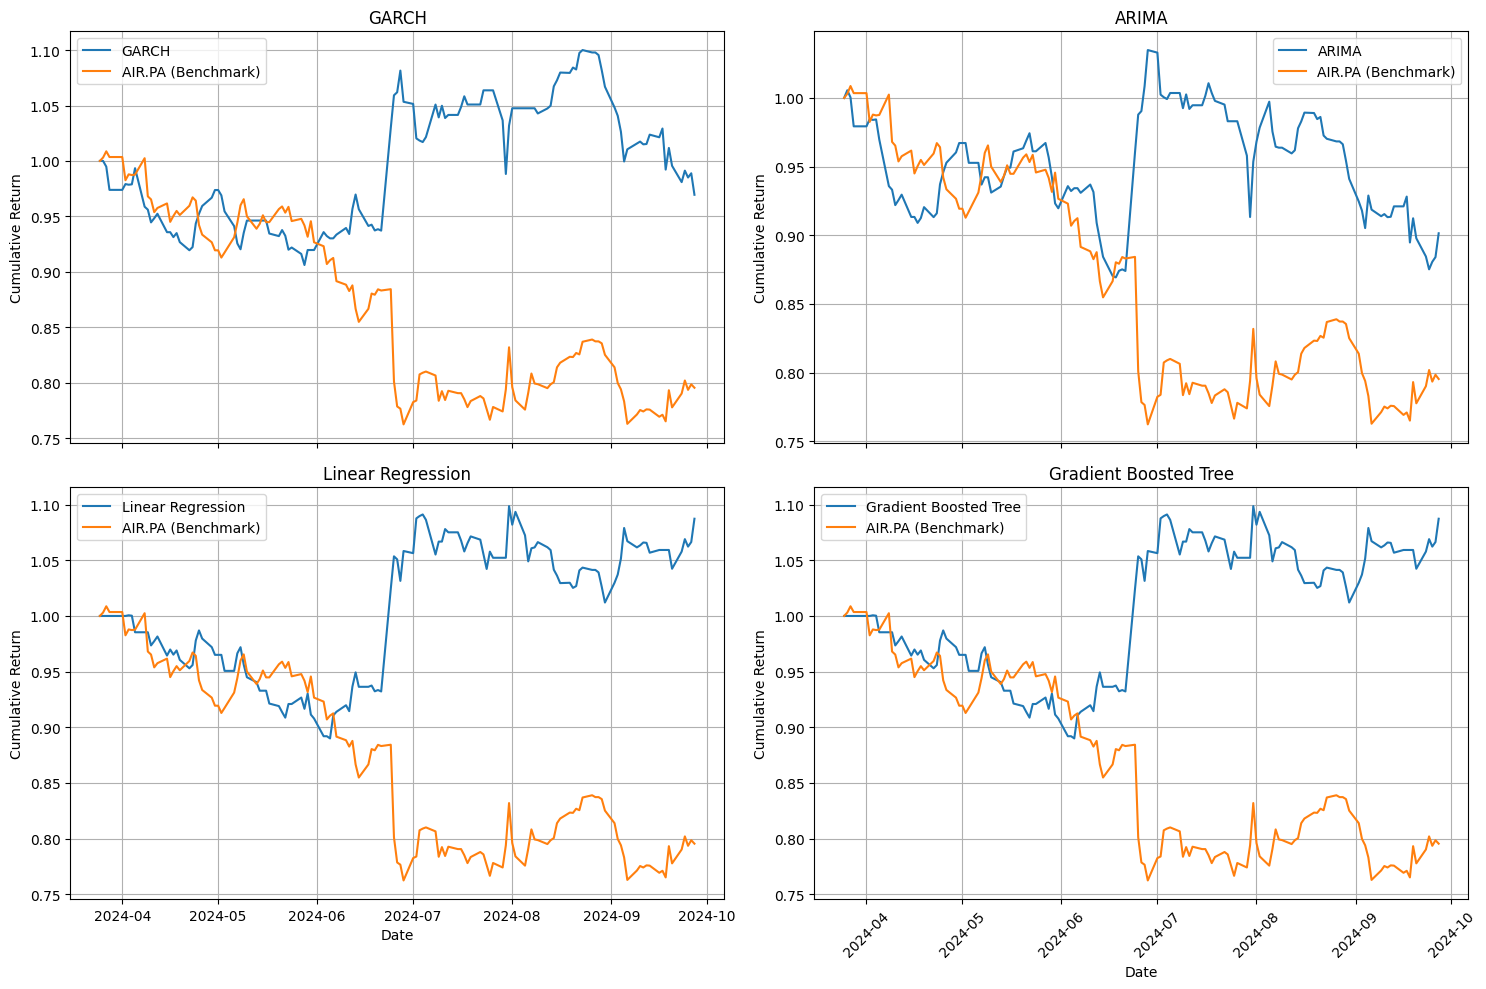

In [34]:
plot_multiple_strategies_performance(df_garch_t, df_arima_t, df_linear_t, df_xgr_t, 'AIR.PA')

### 2. Basket Stocks Strategies